# This file generates test data for the rocket

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

Declarations

In [2]:
TIME = 0
GYRO_X = 1
GYRO_Y = 2
GYRO_Z = 3
ACC_X = 4
ACC_Y = 5
ACC_Z = 6
ALT = 7
STATE = 8

Main Section

Development

In [3]:
columns_ = ['Time', 'Gyro_x', 'Gyro_y', 'Gyro_z', 'Acc_x', 'Acc_y', 'Acc_z', 'Alt', 'State']
df_dict = {
    'Time': [],
    'Gyro_x': [],
    'Gyro_y': [], 
    'Gyro_z': [], 
    'Acc_x': [], 
    'Acc_y': [], 
    'Acc_z': [], 
    'Alt': [], 
    'State': []
}

In [4]:
filename = r'C:\Users\lchu\Documents\UBC Rocket\MajorTom\test-can\SRAD Raw Data.txt'
with open(filename, 'r') as raw_file:
    content = raw_file.readlines()
    flag = True
    for line in content:
        if(flag):
            line = line[:-3]
            line = line.replace(';', ',')
            words = re.split(',', line)
            flag = not flag
        else:
            line = line[:-3]
            words.append(line)
            df_dict['Time'].append(float(words[TIME]))
            df_dict['Gyro_x'].append(float(words[GYRO_X]))
            df_dict['Gyro_y'].append(float(words[GYRO_Y]))
            df_dict['Gyro_z'].append(float(words[GYRO_Z]))
            df_dict['Acc_x'].append(float(words[ACC_X]))
            df_dict['Acc_y'].append(float(words[ACC_Y]))
            df_dict['Acc_z'].append(float(words[ACC_Z]))
            df_dict['Alt'].append(float(words[ALT]))
            df_dict['State'].append((words[STATE]))
            flag = not flag

In [5]:
df = pd.DataFrame(df_dict)

In [6]:
df2 = df.groupby('Time')
df3 = df
df3 = df3.set_index('Time')
df3 = df3[df3.index >= 7428000.0]
df3 = df3[df3.index <= 8500000.0]

In [7]:
df3.to_pickle(r'C:\Users\lchu\Documents\UBC Rocket\MajorTom\test-can\df_pickle')

In [8]:
df3.head()

,Acc_x,Acc_y,Acc_z,Alt,Gyro_x,Gyro_y,Gyro_z,State
Time,,,,,,,,
7428018.0,0.07,-0.02,1.07,-34.20,-2.32,-1.53,-0.79,0
7428073.0,0.07,0.00,1.06,-32.64,-2.44,-0.79,-0.67,0
7428129.0,0.06,0.02,1.03,-33.45,-2.32,-1.22,-0.92,0
7428184.0,0.05,-0.07,1.05,-33.83,-2.14,-1.10,-0.85,0
7428239.0,0.03,-0.06,1.06,-34.76,-2.75,-0.31,0.18,0


In [9]:
df_alt = df3['Alt']

In [10]:
print(type(df_alt))

<class 'pandas.core.series.Series'>


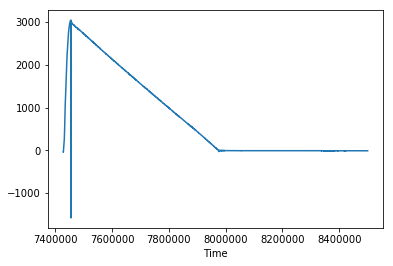

In [11]:
plt.figure(); df_alt.plot();
plt.show()

In [12]:
TRUNCATE_LOW = 7428000.0
TRUNCATE_HIGH = 8500000.0

In [13]:
from random import gauss

In [14]:
gauss(1,1)

1.428149331393275

In [15]:
df_test = df3[df3['Alt'] >= 1]

Marks Binary File

In [27]:
filename_write = r'C:\Users\lchu\Documents\UBC Rocket\MajorTom\test-can\mock_data.dat'
counter = 0
with open(filename_write, 'wb') as write_file:
    for index, row in df_test.iterrows():
        write_file.write(ALT.to_bytes(8, byteorder='little', signed=True))
#         write_file.write('\n')
        data = int(gauss(row['Alt'], 1)).to_bytes(8, byteorder='little', signed=True)
        write_file.write(data)
#         write_file.write(b'\n')

Makes CSV

In [18]:
filename_write = r'C:\Users\lchu\Documents\UBC Rocket\MajorTom\test-can\mock_data.csv'
with open(filename_write, 'w') as write_file:
    for index, row in df_test.iterrows():
        write_file.write(ALT)
        write_file.write(', ')
        data = (gauss(row['Alt'], 1))
        write_file.write(data)
        write_file.write(', ')
        write_file.write(row.index)
        write_file.write('\n')